# Lab 4.02 - Bivariate Analysis of Qualitative Data

In [2]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

## Exercise 2 - NBA Salaries

The file NBA.csv contains annual salaries for all NBA basketball players in the season (2008–2009), check whether there is independence between position and salary. To do this, first change any hyphenated position such as C-F to 
the first listed, in this case C. (Presumably, this is 
the player's primary position.)     
Then remove $ and . in Annual Salary and make Annual Salary categorical with four categories: the first is all salaries below the first quartile, the second is all salaries from the first quartile to the median, and so on.  
First make a plot

Results of the main calculations:
  - χ² ≈ 3.0344 
  - p-value = 0.8045
  - We do not reject H0


  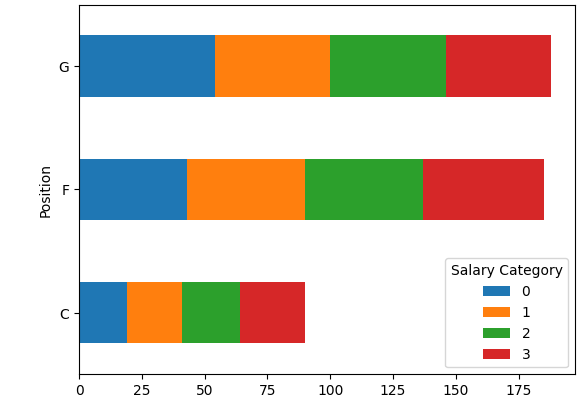

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/NBA.csv', sep=";")
df['Annual Salary'] = df['Annual Salary'].str.replace('[$.]', '', regex=True).astype(int)
q1 = df['Annual Salary'].quantile(0.25)
q2 = df['Annual Salary'].quantile(0.50)
q3 = df['Annual Salary'].quantile(0.75)
bins = [float('-inf'), q1, q2, q3, float('inf')]
labels = ['Low', 'Lower-Mid', 'Upper-Mid', 'High']
df['Salary Category'] = pd.cut(df['Annual Salary'], bins=bins, labels=labels, ordered=True)
df['Position'] = df['Position'].str[0].astype('category')
df.head(10)

,Player,Team,Position,Annual Salary,Contract Yrs,Contract Amt,Contract Thru,Salary Category
0,"Bibby, Mike",Atlanta Hawks,G,14983603.0,1,$14.983.603,2008-09,High
1,"Johnson, Joe",Atlanta Hawks,G,14232566.0,5,$70.000.000,2009-10,High
2,"Smith, Josh",Atlanta Hawks,F,10000000.0,5,$58.000.000,2012-13,High
3,"Claxton, Speedy",Atlanta Hawks,G,5757818.0,4,$25.000.000,2010-11,Upper-Mid
4,"Williams, Marvin",Atlanta Hawks,F,5636142.0,4,$18.160.000,2008-09(t),Upper-Mid
5,"Horford, Al",Atlanta Hawks,C,4023720.0,3,$12.080.160,2009-10,Upper-Mid
6,"Pachulia, Zaza",Atlanta Hawks,C,4000000.0,4,$16.000.000,2008-09,Upper-Mid
7,"Evans, Maurice",Atlanta Hawks,F,2500000.0,3,$7.500.000,2010-11,Lower-Mid
8,"Law, Acie",Atlanta Hawks,G,2071680.0,3,$6.214.920,2009-10,Lower-Mid
9,"Murray, Ronald",Atlanta Hawks,G,1500000.0,1,$1.500.000,2008-09,Lower-Mid


χ² ≈ 3.077


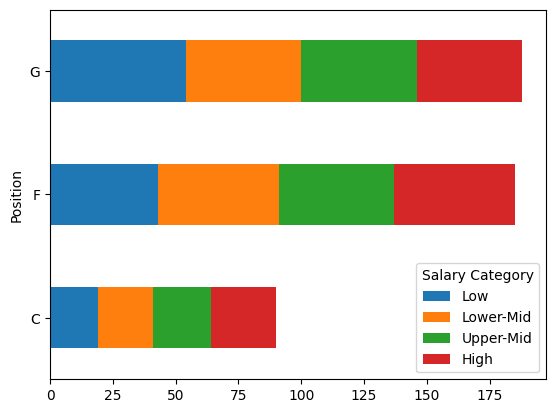

In [32]:
observed = pd.crosstab(df.Position, df['Salary Category'])
observed = observed.astype(float)
observed.plot(kind='barh', stacked=True)
row_sums = observed.sum(axis=1)
col_sums = observed.sum()
n = row_sums.sum()
expected = np.outer(row_sums, col_sums) / n
diffs = (expected - observed)**2 / expected
chi_squared = diffs.values.sum()
print('χ² ≈ %.3f' %chi_squared)


In [48]:
observed = pd.crosstab(df.Position, df['Salary Category'])
chi2, p, *_ = stats.chi2_contingency(observed)

print(f"χ² = {chi2:.4f}")
print(f"p-value = {p:.4f}")
alpha = 0.05
print(f"We {'' if p < alpha else 'do not '}reject H0")

χ² = 3.0774
p-value = 0.7991
We do not reject H0
